## import the imprtant libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import os

## Unziping the file using unzip

In [ ]:
!unzip /content/Pandas-Data-Science-Tasks-master.zip

Archive:  /content/Pandas-Data-Science-Tasks-master.zip
8b511cdf8aeea304bb64710784db29548414b736
   creating: Pandas-Data-Science-Tasks-master/
   creating: Pandas-Data-Science-Tasks-master/Misc/
  inflating: Pandas-Data-Science-Tasks-master/Misc/create_data.py  
  inflating: Pandas-Data-Science-Tasks-master/README.md  
   creating: Pandas-Data-Science-Tasks-master/SalesAnalysis/
   creating: Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/
  inflating: Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/all_data.csv  
  inflating: Pandas-Data-Science-Tasks-master/SalesAnalysis/SalesAnalysis.ipynb  
   creating: Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/
  inflating: Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv  
  inflating: Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_August_2019.csv  
  inflating: Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv  
  inflating: Pandas-Data-Sc

# Merging the all 12 Months file in one single dataframe

In [ ]:
files = [file for file in os.listdir('/content/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

#intializing a new dataframe
all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
  all_months_data = pd.concat([all_months_data,df])

#converting teh dataframe using pd.to_csv() function without indexing
all_months_data.to_csv("all_data.csv",index=False)

#printing first 5 rows of dataset
print(all_months_data.shape)
all_months_data.head()

(186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


# *Clean the data*

seeiing the null data using isnull

drop the null value containing rows

In [ ]:

all_months_data[all_months_data['Order Date'].isnull()]
all_months_data.dropna(how = 'all', inplace=True)
all_months_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

But we also have the value 'Or' containing months column so for this issue lets see

In [ ]:
all_months_data['Months'] = all_months_data['Order Date'].str[:2]

temp_df = all_months_data[all_months_data['Months']=='Or']
#and printing them in some of the rows
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


for this problem we can again modify the dataframe like this

In [ ]:
all_months_data = all_months_data[all_months_data['Months']!='Or']

#cconfirming thedataset if again containing any null value0u970okd
all_months_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Months              0
dtype: int64

Adding the months comulmn

In [ ]:
#all_months_data['Months'] = all_months_data['Order Date'].str[:2]

#changing the data type
all_months_data['Months'] = all_months_data['Months'].astype('int32')
all_months_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


# Task 1  What was the best month for Sale ? how much was earned on that Month?

**for this task we have to add a new column called Sales column which is multipication of the Quantity and Price Columns**

In [ ]:
#converting the Quantity Ordered and Price column Data type into numeric
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each']  = pd.to_numeric(all_months_data['Price Each'])

#knowing the info about the data type of all column b yinfo function
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Months            185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


Adding the new column called Sales

In [ ]:
all_months_data['Sales'] = all_months_data['Quantity Ordered']*all_months_data['Price Each']
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


*For this Task we will group all the months applying the groupby function and then print the sum*

In [ ]:
task1 = all_months_data.groupby('Months').sum()

#finding the month in which our sales was maximum
print(task1)
#After saw this table we can clearly see Month 12 containing maximum no of sales
print(task1.max())

#and the worst month is January with minimum Sales
print("\n\n")
task1.min()

        Quantity Ordered  Price Each       Sales
Months                                          
1                  10903  1811768.38  1822256.73
2                  13449  2188884.72  2202022.42
3                  17005  2791207.83  2807100.38
4                  20558  3367671.02  3390670.24
5                  18667  3135125.13  3152606.75
6                  15253  2562025.61  2577802.26
7                  16072  2632539.56  2647775.76
8                  13448  2230345.42  2244467.88
9                  13109  2084992.09  2097560.13
10                 22703  3715554.83  3736726.88
11                 19798  3180600.68  3199603.20
12                 28114  4588415.41  4613443.34
Quantity Ordered      28114.00
Price Each          4588415.41
Sales               4613443.34
dtype: float64





Quantity Ordered      10903.00
Price Each          1811768.38
Sales               1822256.73
dtype: float64

Ploting the graph

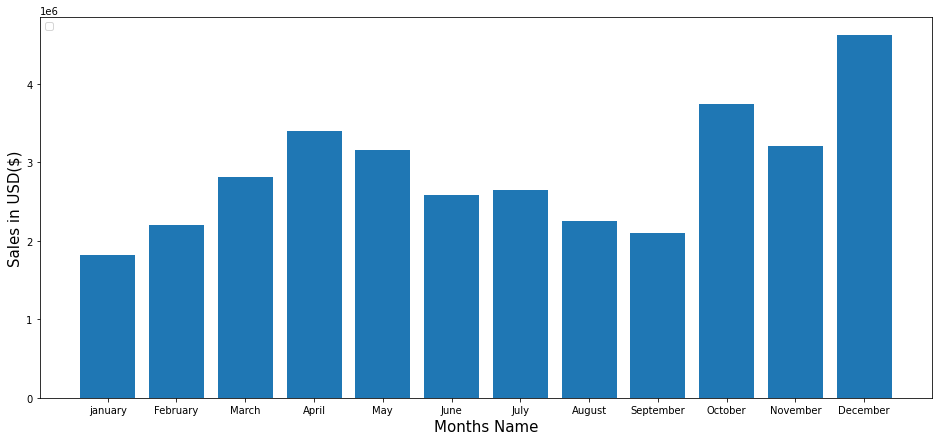

In [ ]:
result = task1.copy()
months = np.array(range(1,13),str)
plt.figure(figsize=(16,7))
plt.bar(months,result['Sales'])
plt.xticks(months,['january','February','March','April','May','June','July',
            'August','September','October','November','December'
          ])
plt.xlabel('Months Name',fontsize=15)
plt.ylabel('Sales in USD($)',fontsize=15)
plt.legend(loc=2)
plt.show()

new task

# Taks 2 : What city had the highest number of sales?

for this task we have add new column called CITY

In [ ]:
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: get_city(x)+ ' '+ get_state(x))
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin TX
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta GA


**For this task we have to use the group by function in city**

In [ ]:
temp_df1 = all_months_data.groupby('City').sum().copy()
temp_df1

,Quantity Ordered,Price Each,Months,Sales,Hour,Minute
City,,,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58,214264,442932
Austin TX,11153,1809873.61,69829,1819581.75,141946,289060
Boston MA,22528,3637409.77,141112,3661642.01,288225,590442
Dallas TX,16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles CA,33289,5421435.23,208325,5452570.80,427444,866638
New York City NY,27932,4635370.83,175741,4664317.43,357696,733598
Portland ME,2750,447189.25,17144,449758.27,35211,72856
Portland OR,11303,1860558.22,70621,1870732.34,144421,295533
San Francisco CA,50239,8211461.74,315520,8262203.91,643265,1319477


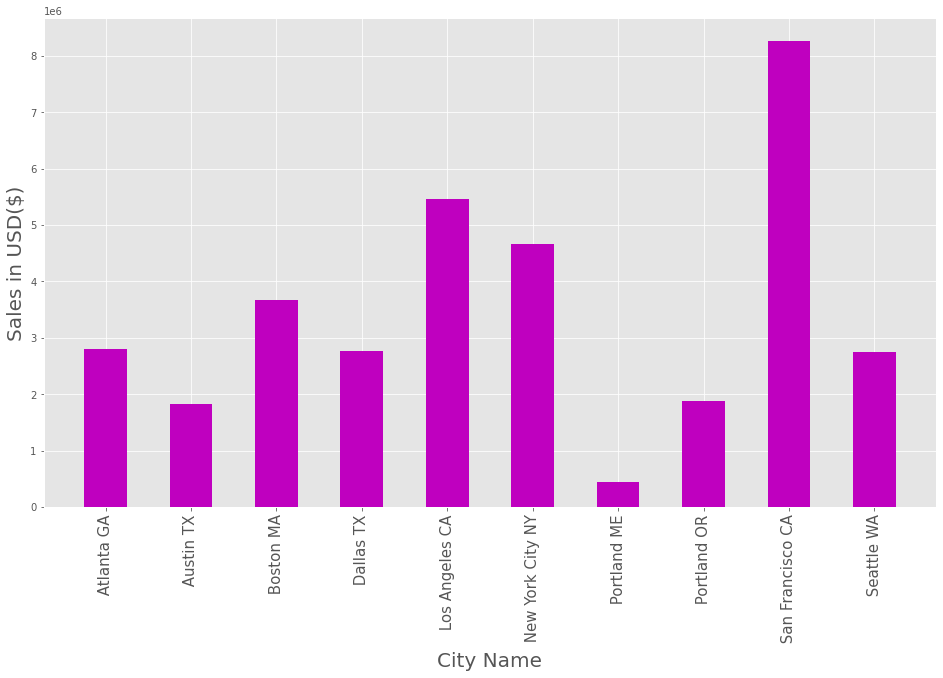

In [ ]:
#we should also plot this data in barchart
plt.figure(figsize=(16,9))
x = [ city for city , df in all_months_data.groupby('City')]
plt.bar(x,temp_df1['Sales'],color = 'm',width=0.5)

plt.xticks(rotation = 'vertical' , size=15)
plt.xlabel('City Name',fontsize=20)
plt.ylabel('Sales in USD($)',fontsize=20)
plt.show()

new task

# Task3:  What time should we display advertisement to maximize likehood of customer's buying Product?

In [ ]:
all_months_data['Order Date'] = all_months_data['Order Date'].apply(pd.to_datetime)

#adding new hour and minute columns
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour
all_months_data['Minute']= all_months_data['Order Date'].dt.minute

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles CA,14,44
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin TX,10,19
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles CA,17,48
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle WA,7,52
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta GA,19,3


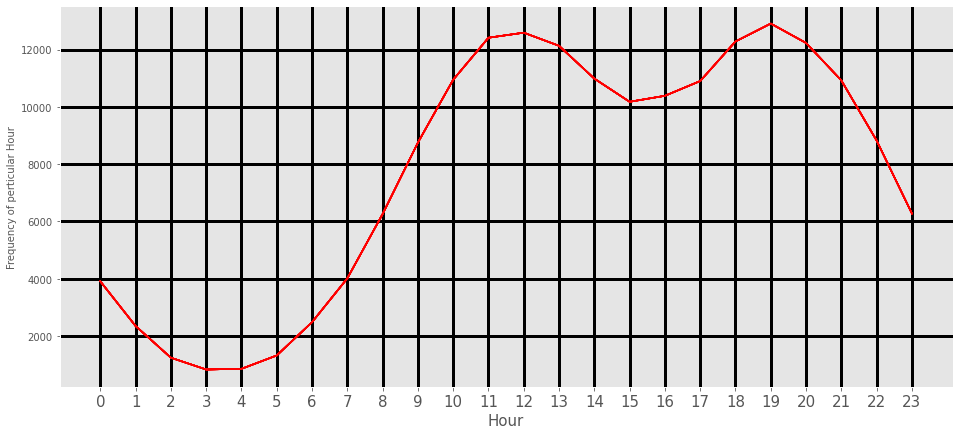

In [ ]:
hour = [hour for  hour , df in all_months_data.groupby('Hour')]

plt.style.use('ggplot')
plt.figure(figsize=(16,7))
plt.plot(hour,all_months_data.groupby('Hour').count(),color='r')
plt.xticks(hour,fontsize=15)
plt.ylabel('Frequency of perticular Hour',fontsize=10)
plt.xlabel('Hour',fontsize=15)
plt.grid(linestyle='-',linewidth=3,color='k')
plt.show()

so we can  say 11 am and 6 - 7 pm is good time advertisemnt

# Task 4:  **What Products are most often sold together ?**

for that we have to look thier order id

In [ ]:
temp_df = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]
temp_df

temp_df['Items Grouped'] = temp_df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
temp_df.head()
temp_df = temp_df[['Order ID','Items Grouped']].drop_duplicates()

temp_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Items Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"


#importing importance libraries

In [ ]:
from itertools import combinations
from collections import Counter


count = Counter()

for row  in temp_df['Items Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key , value in count.most_common(10):
  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#Task 5 **What Product of most soled ? why do you think it sold the most?**

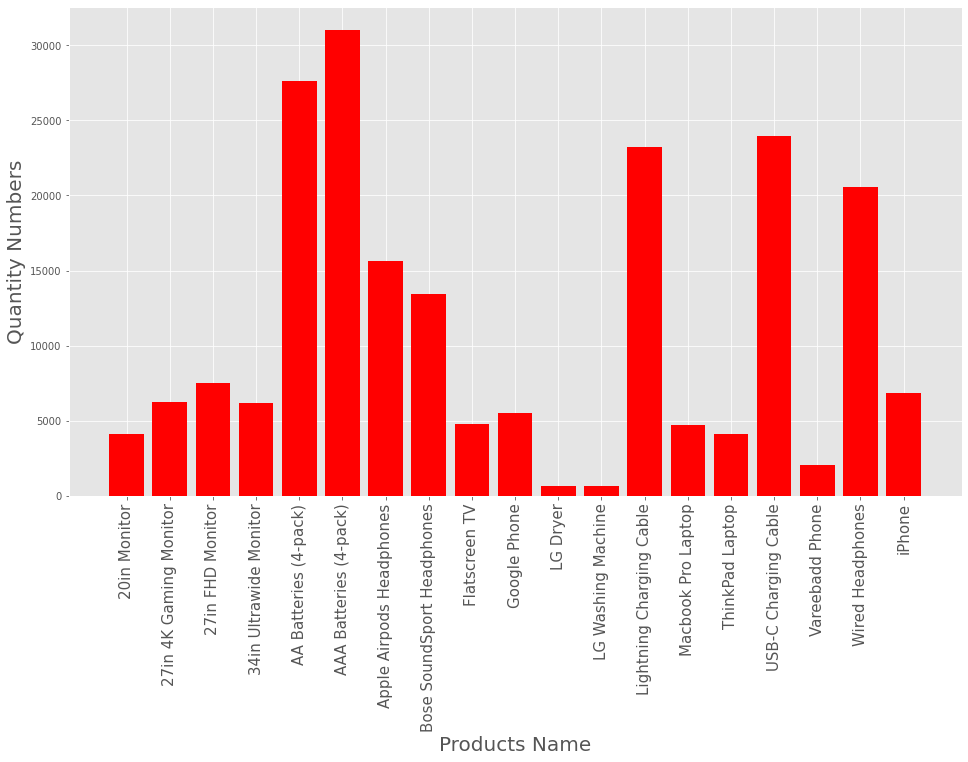

In [ ]:
product_groups = all_months_data.groupby('Product')
quantity_Number = product_groups.sum()['Quantity Ordered']
products = [product for product , df in product_groups]

plt.figure(figsize=(16,9))
plt.bar(products,quantity_Number,color='r')
plt.xticks(rotation='vertical',size=15)
plt.xlabel('Products Name',fontsize=20)
plt.ylabel('Quantity Numbers',fontsize=20)
plt.show()




<Figure size 1440x720 with 0 Axes>

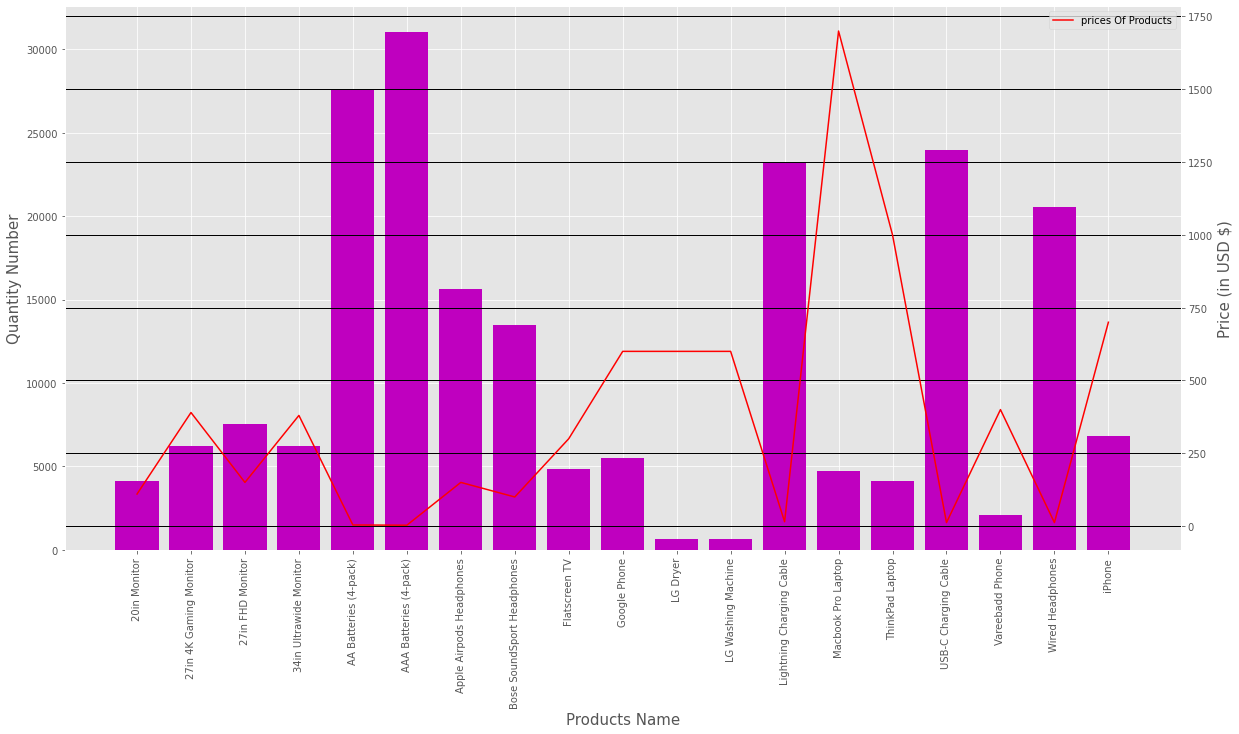

In [ ]:
prices = all_months_data.groupby('Product').mean()['Price Each']

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot()

ax2  = ax1.twinx()
ax1.bar(products,quantity_Number,color='m',label='Quantity Number of Products')
ax2.plot(products,prices,color='r',label='prices Of Products')

ax1.set_xlabel('Products Name',fontsize=15)
ax1.set_ylabel('Quantity Number',fontsize=15)
ax2.set_ylabel('Price (in USD $)',fontsize=15)
ax1.set_xticklabels(products,rotation='vertical',fontsize=10)
plt.legend(loc=0)
plt.grid(linestyle = '-',linewidth=1,color='k')
plt.show()

we can analysis that how quantity of products corelate tha prices of products , if Quantity of Products is high the Prices of perticular products is low but in case of the of latpop it's inconsistance becuase of their need is very high.